In [2]:
import post

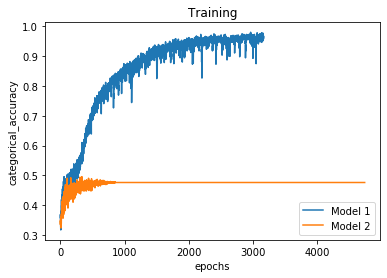

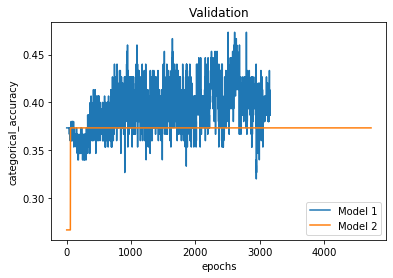

Average Val Accuracy:  0.4193333387374878


In [45]:
post.visualizeExperiment('results', '3t*.pkl')

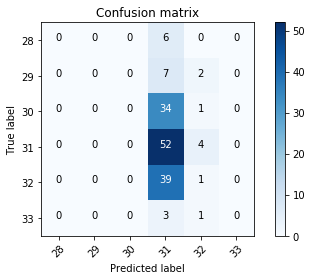

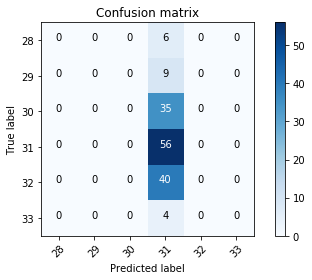

In [46]:
post.visualizeConfusion('results', '3t*.pkl')